# Smart Train Compressor Monitoring System.  

Link to the dataset:
https://archive.ics.uci.edu/dataset/791/metropt+3+dataset

In [1]:
import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sn
import scipy.stats as stats
from timeit import default_timer as timer
import time

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import ElasticNetCV

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SequentialFeatureSelector

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
cd drive/MyDrive/Masters_AI/Data Analytics and IOT/Project/Code

/content/drive/MyDrive/Masters_AI/Data Analytics and IOT/Project/Code


#Pre-Processing the data

In [4]:
#Read your data into a pandas dataframe here

df = pd.read_csv("MetroPT3_AirCompressor.csv")
df.head()

,Unnamed: 0,timestamp,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Motor_current,COMP,DV_eletric,Towers,MPG,LPS,Pressure_switch,Oil_level,Caudal_impulses
0,0,2020-02-01 00:00:00,-0.012,9.358,9.340,-0.024,9.358,53.600,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
1,10,2020-02-01 00:00:10,-0.014,9.348,9.332,-0.022,9.348,53.675,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
2,20,2020-02-01 00:00:19,-0.012,9.338,9.322,-0.022,9.338,53.600,0.0425,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
3,30,2020-02-01 00:00:29,-0.012,9.328,9.312,-0.022,9.328,53.425,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
4,40,2020-02-01 00:00:39,-0.012,9.318,9.302,-0.022,9.318,53.475,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0


In [5]:
#Total 1516948 rows in the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1516948 entries, 0 to 1516947
Data columns (total 17 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   Unnamed: 0       1516948 non-null  int64  
 1   timestamp        1516948 non-null  object 
 2   TP2              1516948 non-null  float64
 3   TP3              1516948 non-null  float64
 4   H1               1516948 non-null  float64
 5   DV_pressure      1516948 non-null  float64
 6   Reservoirs       1516948 non-null  float64
 7   Oil_temperature  1516948 non-null  float64
 8   Motor_current    1516948 non-null  float64
 9   COMP             1516948 non-null  float64
 10  DV_eletric       1516948 non-null  float64
 11  Towers           1516948 non-null  float64
 12  MPG              1516948 non-null  float64
 13  LPS              1516948 non-null  float64
 14  Pressure_switch  1516948 non-null  float64
 15  Oil_level        1516948 non-null  float64
 16  Caudal_impulses  1

In [6]:
df.dtypes

,0
Unnamed: 0,int64
timestamp,object
TP2,float64
TP3,float64
H1,float64
DV_pressure,float64
Reservoirs,float64
Oil_temperature,float64
Motor_current,float64
COMP,float64


In [7]:
#Column Unnamed is not required hence let's drop it from the dataset

df = df.drop('Unnamed: 0', axis= 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1516948 entries, 0 to 1516947
Data columns (total 16 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   timestamp        1516948 non-null  object 
 1   TP2              1516948 non-null  float64
 2   TP3              1516948 non-null  float64
 3   H1               1516948 non-null  float64
 4   DV_pressure      1516948 non-null  float64
 5   Reservoirs       1516948 non-null  float64
 6   Oil_temperature  1516948 non-null  float64
 7   Motor_current    1516948 non-null  float64
 8   COMP             1516948 non-null  float64
 9   DV_eletric       1516948 non-null  float64
 10  Towers           1516948 non-null  float64
 11  MPG              1516948 non-null  float64
 12  LPS              1516948 non-null  float64
 13  Pressure_switch  1516948 non-null  float64
 14  Oil_level        1516948 non-null  float64
 15  Caudal_impulses  1516948 non-null  float64
dtypes: float64(15), ob

In [8]:
#Total 16 columns in the dataset

df.columns

Index(['timestamp', 'TP2', 'TP3', 'H1', 'DV_pressure', 'Reservoirs',
       'Oil_temperature', 'Motor_current', 'COMP', 'DV_eletric', 'Towers',
       'MPG', 'LPS', 'Pressure_switch', 'Oil_level', 'Caudal_impulses'],
      dtype='object')

In [9]:
import datetime

#Check the current type of timestamp
print(f"Current type of timestamp is {type(df.timestamp[0])}")

#Convert timestamp to pandas.DateTime
df['timestamp'] = df['timestamp'].apply(pd.to_datetime, format = "%Y-%m-%d %H:%M:%S")

#Re-check the type
print(f"Current type of timestamp is {type(df.timestamp[0])}")

Current type of timestamp is <class 'str'>
Current type of timestamp is <class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [10]:
df.head()

,timestamp,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Motor_current,COMP,DV_eletric,Towers,MPG,LPS,Pressure_switch,Oil_level,Caudal_impulses
0,2020-02-01 00:00:00,-0.012,9.358,9.340,-0.024,9.358,53.600,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
1,2020-02-01 00:00:10,-0.014,9.348,9.332,-0.022,9.348,53.675,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
2,2020-02-01 00:00:19,-0.012,9.338,9.322,-0.022,9.338,53.600,0.0425,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
3,2020-02-01 00:00:29,-0.012,9.328,9.312,-0.022,9.328,53.425,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
4,2020-02-01 00:00:39,-0.012,9.318,9.302,-0.022,9.318,53.475,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0


In [11]:
df.tail()

,timestamp,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Motor_current,COMP,DV_eletric,Towers,MPG,LPS,Pressure_switch,Oil_level,Caudal_impulses
1516943,2020-09-01 03:59:10,-0.014,8.918,8.906,-0.022,8.918,59.675,0.0425,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
1516944,2020-09-01 03:59:20,-0.014,8.904,8.888,-0.020,8.904,59.600,0.0450,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
1516945,2020-09-01 03:59:30,-0.014,8.890,8.876,-0.022,8.892,59.600,0.0425,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
1516946,2020-09-01 03:59:40,-0.012,8.876,8.864,-0.022,8.878,59.550,0.0450,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
1516947,2020-09-01 03:59:50,-0.014,8.860,8.848,-0.022,8.864,59.475,0.0425,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0


In [12]:
desc = df.describe()
#force the printout not to use scientific notation
desc[desc.columns[:-1]] = desc[desc.columns[:-1]].apply(lambda x: x.apply("{0:.4f}".format))
desc

,timestamp,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Motor_current,COMP,DV_eletric,Towers,MPG,LPS,Pressure_switch,Oil_level,Caudal_impulses
count,1516948.0000,1516948.0000,1516948.0000,1516948.0000,1516948.0000,1516948.0000,1516948.0000,1516948.0000,1516948.0000,1516948.0000,1516948.0000,1516948.0000,1516948.0000,1516948.0000,1516948.0000,1.516948e+06
mean,.4f,1.3678,8.9846,7.5682,0.0560,8.9852,62.6442,2.0502,0.8370,0.1606,0.9198,0.8327,0.0034,0.9914,0.9042,9.371066e-01
min,.4f,-0.0320,0.7300,-0.0360,-0.0320,0.7120,15.4000,0.0200,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.000000e+00
25%,.4f,-0.0140,8.4920,8.2540,-0.0220,8.4940,57.7750,0.0400,1.0000,0.0000,1.0000,1.0000,0.0000,1.0000,1.0000,1.000000e+00
50%,.4f,-0.0120,8.9600,8.7840,-0.0200,8.9600,62.7000,0.0450,1.0000,0.0000,1.0000,1.0000,0.0000,1.0000,1.0000,1.000000e+00
75%,.4f,-0.0100,9.4920,9.3740,-0.0180,9.4920,67.2500,3.8075,1.0000,0.0000,1.0000,1.0000,0.0000,1.0000,1.0000,1.000000e+00
max,.4f,10.6760,10.3020,10.2880,9.8440,10.3000,89.0500,9.2950,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.000000e+00
std,nan,3.2509,0.6391,3.3332,0.3824,0.6383,6.5163,2.3021,0.3694,0.3672,0.2715,0.3733,0.0584,0.0921,0.2944,2.427712e-01


In [13]:
#No missing values found in the dataset

df.isna().sum()

,0
timestamp,0
TP2,0
TP3,0
H1,0
DV_pressure,0
Reservoirs,0
Oil_temperature,0
Motor_current,0
COMP,0
DV_eletric,0


In [14]:
#Create a new column for target variable called status, indicate the equipment has deficiencies and need to be maintained
# status = 0; system ups and running
# status = 1; system downs and needs recovering

labeled_data = df.copy()
labeled_data['status'] = 0
print(labeled_data.head(5))

            timestamp    TP2    TP3     H1  DV_pressure  Reservoirs  \
0 2020-02-01 00:00:00 -0.012  9.358  9.340       -0.024       9.358   
1 2020-02-01 00:00:10 -0.014  9.348  9.332       -0.022       9.348   
2 2020-02-01 00:00:19 -0.012  9.338  9.322       -0.022       9.338   
3 2020-02-01 00:00:29 -0.012  9.328  9.312       -0.022       9.328   
4 2020-02-01 00:00:39 -0.012  9.318  9.302       -0.022       9.318   

   Oil_temperature  Motor_current  COMP  DV_eletric  Towers  MPG  LPS  \
0           53.600         0.0400   1.0         0.0     1.0  1.0  0.0   
1           53.675         0.0400   1.0         0.0     1.0  1.0  0.0   
2           53.600         0.0425   1.0         0.0     1.0  1.0  0.0   
3           53.425         0.0400   1.0         0.0     1.0  1.0  0.0   
4           53.475         0.0400   1.0         0.0     1.0  1.0  0.0   

   Pressure_switch  Oil_level  Caudal_impulses  status  
0              1.0        1.0              1.0       0  
1              1.0  

Below is the table which has data depicting the start and end time of failure(Air leak) and its severity

Let's change the status column in df accordingly as below


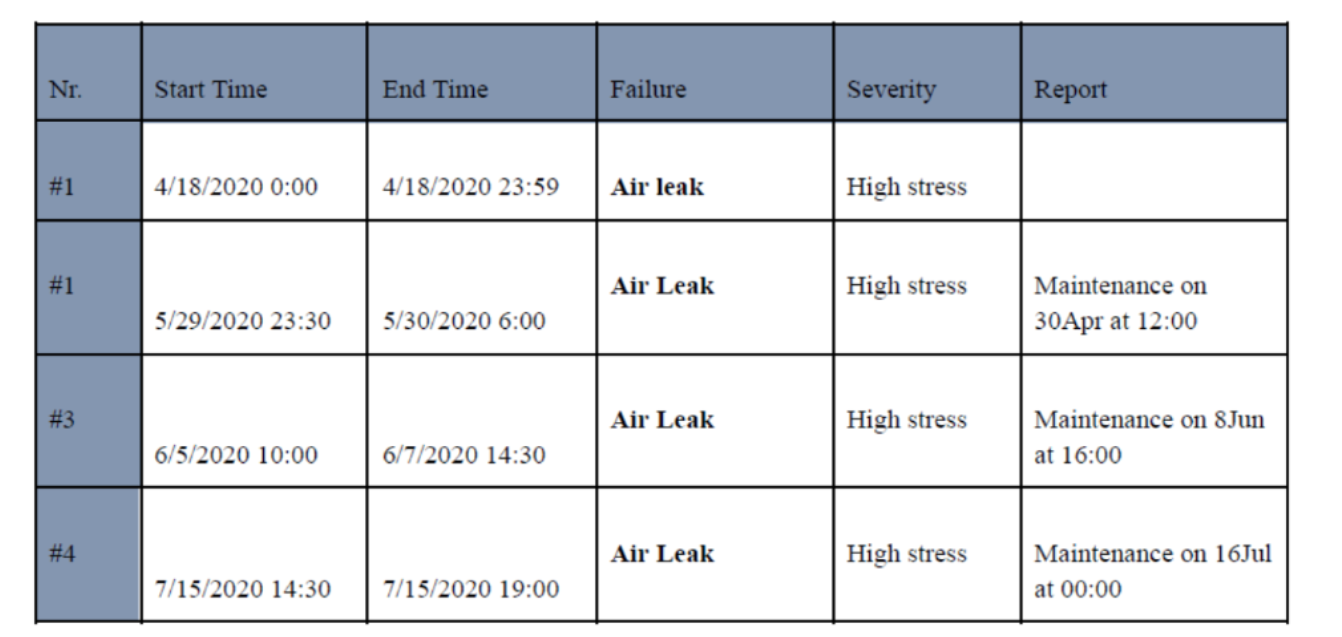

In [15]:
def to_datetime(failure_date):
  result = []
  format =  "%Y-%m-%d %H:%M:%S"
  for i in failure_date:
    result.append(pd.to_datetime(i, format = format))
  return result

failure_start_time = to_datetime(["2020-04-18 00:00:00", "2020-05-29 23:30:00", "2020-06-05 10:00:00", "2020-07-15 14:30:00"] )
failure_end_time   = to_datetime(["2020-04-18 23:59:00", "2020-05-30 06:00:00", "2020-06-07 14:30:00", "2020-07-15 19:00:00"] )

print(failure_start_time,"\n", failure_end_time[0].minute)

[Timestamp('2020-04-18 00:00:00'), Timestamp('2020-05-29 23:30:00'), Timestamp('2020-06-05 10:00:00'), Timestamp('2020-07-15 14:30:00')] 
 59


In [16]:
def in_between(x, start, end):

  start_con = x >= start
  end_con = x<= end

  inbetween_con = start_con and end_con
  if inbetween_con:
    return 1
  else:
    return 0

In [17]:
labeled_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1516948 entries, 0 to 1516947
Data columns (total 17 columns):
 #   Column           Non-Null Count    Dtype         
---  ------           --------------    -----         
 0   timestamp        1516948 non-null  datetime64[ns]
 1   TP2              1516948 non-null  float64       
 2   TP3              1516948 non-null  float64       
 3   H1               1516948 non-null  float64       
 4   DV_pressure      1516948 non-null  float64       
 5   Reservoirs       1516948 non-null  float64       
 6   Oil_temperature  1516948 non-null  float64       
 7   Motor_current    1516948 non-null  float64       
 8   COMP             1516948 non-null  float64       
 9   DV_eletric       1516948 non-null  float64       
 10  Towers           1516948 non-null  float64       
 11  MPG              1516948 non-null  float64       
 12  LPS              1516948 non-null  float64       
 13  Pressure_switch  1516948 non-null  float64       
 14  Oi

In [18]:
failure_indx = []
import numpy as np
for i, (start_time, end_time) in enumerate(zip(failure_start_time, failure_end_time)):
  mask = labeled_data['timestamp'].apply(in_between, start = start_time, end = end_time)
  indx = labeled_data.index[mask == True].tolist()
  failure_indx += indx


print(f" Found {len(failure_indx)} samples representing failure state")

 Found 29954 samples representing failure state


In [19]:
#Set the sample with the timestamp which falls between the failure time to 1

labeled_data.loc[failure_indx, 'status'] = 1

In [20]:
#Confirmation that status column has values set to 1

labeled_data.loc[labeled_data['status'] == 1].head()

,timestamp,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Motor_current,COMP,DV_eletric,Towers,MPG,LPS,Pressure_switch,Oil_level,Caudal_impulses,status
562564,2020-04-18 00:00:01,-0.018,8.248,8.238,-0.024,8.248,49.45,0.04,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1
562565,2020-04-18 00:00:13,-0.018,8.248,8.238,-0.024,8.248,49.45,0.04,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1
562566,2020-04-18 00:00:24,-0.018,8.248,8.238,-0.024,8.248,49.45,0.04,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1
562567,2020-04-18 00:00:36,-0.018,8.248,8.238,-0.024,8.248,49.45,0.04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
562568,2020-04-18 00:00:49,-0.018,8.248,8.238,-0.024,8.248,49.45,0.04,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1


In [21]:
#Check the number of positive samples

print(f"We have {labeled_data['status'][labeled_data['status']==1].count()} positve samples" )

We have 29954 positve samples


In [22]:
#We have 30K positive samples(status = 1) and 1500K negative samples(status = 0)
#Seperate Positive samples and Negative sample

pos_data = labeled_data[labeled_data['status'] == 1]
neg_data = labeled_data[labeled_data['status'] == 0]

#Print out the info of 2 dataset

print(f"Positive dataset\n {pos_data.info()}\n")
print(f"Negative dataset\n {neg_data.info()}\n")

<class 'pandas.core.frame.DataFrame'>
Index: 29954 entries, 562564 to 1172714
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   timestamp        29954 non-null  datetime64[ns]
 1   TP2              29954 non-null  float64       
 2   TP3              29954 non-null  float64       
 3   H1               29954 non-null  float64       
 4   DV_pressure      29954 non-null  float64       
 5   Reservoirs       29954 non-null  float64       
 6   Oil_temperature  29954 non-null  float64       
 7   Motor_current    29954 non-null  float64       
 8   COMP             29954 non-null  float64       
 9   DV_eletric       29954 non-null  float64       
 10  Towers           29954 non-null  float64       
 11  MPG              29954 non-null  float64       
 12  LPS              29954 non-null  float64       
 13  Pressure_switch  29954 non-null  float64       
 14  Oil_level        29954 non-null  flo

As we can see, we have around 30K postive samples and 1500K negative samples. This indicates highly imbalanced dataset. Thus, we have to subsample the negative class to balance the training data. To achive this, we will randomly sample 30K negative sample from the set of 1500K sample

In [23]:
n_positives = int(pos_data['status'].count())
sub_neg_data = neg_data.sample(n_positives, random_state = 42)
print(f"Negative dataset after subsampling {sub_neg_data.info()}")

<class 'pandas.core.frame.DataFrame'>
Index: 29954 entries, 1306134 to 1276653
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   timestamp        29954 non-null  datetime64[ns]
 1   TP2              29954 non-null  float64       
 2   TP3              29954 non-null  float64       
 3   H1               29954 non-null  float64       
 4   DV_pressure      29954 non-null  float64       
 5   Reservoirs       29954 non-null  float64       
 6   Oil_temperature  29954 non-null  float64       
 7   Motor_current    29954 non-null  float64       
 8   COMP             29954 non-null  float64       
 9   DV_eletric       29954 non-null  float64       
 10  Towers           29954 non-null  float64       
 11  MPG              29954 non-null  float64       
 12  LPS              29954 non-null  float64       
 13  Pressure_switch  29954 non-null  float64       
 14  Oil_level        29954 non-null  fl

In [24]:
merged_data = pd.concat([pos_data, sub_neg_data], axis = 0)
print(f"Merged dataset\n")
merged_data.info()

Merged dataset

<class 'pandas.core.frame.DataFrame'>
Index: 59908 entries, 562564 to 1276653
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   timestamp        59908 non-null  datetime64[ns]
 1   TP2              59908 non-null  float64       
 2   TP3              59908 non-null  float64       
 3   H1               59908 non-null  float64       
 4   DV_pressure      59908 non-null  float64       
 5   Reservoirs       59908 non-null  float64       
 6   Oil_temperature  59908 non-null  float64       
 7   Motor_current    59908 non-null  float64       
 8   COMP             59908 non-null  float64       
 9   DV_eletric       59908 non-null  float64       
 10  Towers           59908 non-null  float64       
 11  MPG              59908 non-null  float64       
 12  LPS              59908 non-null  float64       
 13  Pressure_switch  59908 non-null  float64       
 14  Oil_level        599

In [25]:
merged_data.count()

,0
timestamp,59908
TP2,59908
TP3,59908
H1,59908
DV_pressure,59908
Reservoirs,59908
Oil_temperature,59908
Motor_current,59908
COMP,59908
DV_eletric,59908


In [26]:
#So now total we have 60K(59908) rows

#Check for normality of the dataset
for c in labeled_data.columns:
  if c not in ["timestamp"]:
    print(f"Column: {c}")
    print("Skewness :", labeled_data[c].skew())
    print("Kurtosis :", labeled_data[c].kurtosis())
    print('\n')

'''Skewness (should be near 0 for normality).
Kurtosis (should be near 3 for normality).'''

Column: TP2
Skewness : 1.9862790464436246
Kurtosis : 2.0607196560924623


Column: TP3
Skewness : -0.8773494232910315
Kurtosis : 7.3953155290741215


Column: H1
Skewness : -1.7649601422015502
Kurtosis : 1.296243561505554


Column: DV_pressure
Skewness : 5.720572231479799
Kurtosis : 38.71496399421707


Column: Reservoirs
Skewness : -0.8861543541734949
Kurtosis : 7.482164205178446


Column: Oil_temperature
Skewness : -0.0457905219254049
Kurtosis : -0.0577928857133192


Column: Motor_current
Skewness : 0.4485614411010067
Kurtosis : -1.4507528750128584


Column: COMP
Skewness : -1.8243235787816001
Kurtosis : 1.328158271189443


Column: DV_eletric
Skewness : 1.8486714946140845
Kurtosis : 1.4175881639972743


Column: Towers
Skewness : -3.092489686464699
Kurtosis : 7.56350243288839


Column: MPG
Skewness : -1.7824061035688574
Kurtosis : 1.1769730698023344


Column: LPS
Skewness : 17.01174688960155
Kurtosis : 287.39991115447214


Column: Pressure_switch
Skewness : -10.667098915317187
Kurtosis :

'Skewness (should be near 0 for normality).\nKurtosis (should be near 3 for normality).'

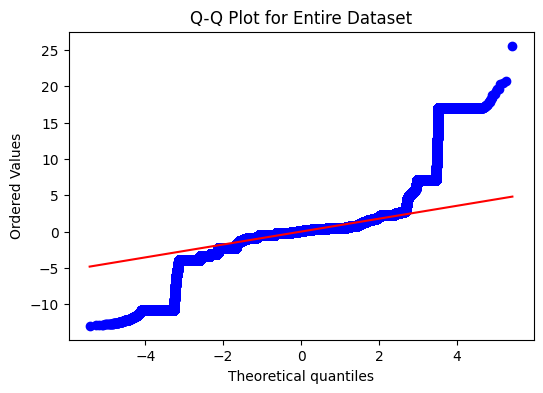

In [27]:
#Plot Q-Q plot to visualize if the data is normally distributed or skewed

# Select numeric columns and standardize them
numeric_cols = labeled_data.select_dtypes(include=['number'])
standardized_data = (numeric_cols - numeric_cols.mean()) / numeric_cols.std()

# Flatten all values into a single array
flattened_data = standardized_data.values.flatten()

# Q-Q Plot
plt.figure(figsize=(6, 4))
stats.probplot(flattened_data, dist="norm", plot=plt)
plt.title("Q-Q Plot for Entire Dataset")
plt.show()

#The dataset is skewed hence we can consider IQR to find and drop outliers present
#Why skewed?because as per below graph the plot is not aligned to the diagonal line
#If the data was normally distributed we would have used Z-score to find and drop outliers

 Why Standardize?
Different columns have different scales, so we standardize (convert to Z-scores).
This ensures all columns are treated equally in the Q-Q plot.
🔹 Interpretation
If points follow the diagonal, the dataset is roughly normally distributed ✅
If points deviate significantly, the dataset is not normal ❌

In [28]:
#Find and drop outliers

def investigate_outliers(data, c):
    q1 = data[c].quantile(0.25)
    q3 = data[c].quantile(0.75)
    iqr = q3 - q1
    ll = q1 - 1.5*iqr
    ul = q3 + 1.5*iqr

    num_outliers = data[data[c] < ll][c].count()  + data[data[c] > ul][c].count()
    if num_outliers>0:
        print(f"Found {num_outliers} oulier(s) for feature {c}")
    return {'col': c, 'n_outliers': num_outliers, 'll': ll, 'ul': ul, 'q1': q1, 'q3':q3}

print("\nDropping outliers ...\n")
clean_data = merged_data.copy()
for i in range(5):
  for c in clean_data.columns:
      if c not in ["Unnamed: 0","timestamp"]:
          cue = investigate_outliers(clean_data, c)
          if cue["n_outliers"] > 0 and (cue["q1"]!= cue["q3"]):
              print(f"Droping {cue['n_outliers']} from column {c}")
              clean_data = clean_data[clean_data[c]> cue["ll"]]
              clean_data = clean_data[clean_data[c]< cue["ul"]]
              print(f"{clean_data.shape[0]} samples left\n")
          elif (cue["q1"]== cue["q3"]):
              print("Skipping .. data has Q1 equals to Q3")
              print(f"{clean_data.shape[0]} rows left\n")


print("\nDropping Completed ...\n")
#Recheck data
for c in clean_data.columns:
    if c not in ["Unnamed: 0","timestamp","COMP", 'status']:
        cue = investigate_outliers(clean_data, c)


Dropping outliers ...

Found 424 oulier(s) for feature TP3
Droping 424 from column TP3
59484 samples left

Found 5 oulier(s) for feature DV_pressure
Droping 5 from column DV_pressure
59479 samples left

Found 3 oulier(s) for feature Reservoirs
Droping 3 from column Reservoirs
59476 samples left

Found 29 oulier(s) for feature Oil_temperature
Droping 29 from column Oil_temperature
59447 samples left

Found 395 oulier(s) for feature LPS
Skipping .. data has Q1 equals to Q3
59447 rows left

Found 402 oulier(s) for feature Pressure_switch
Skipping .. data has Q1 equals to Q3
59447 rows left

Found 2897 oulier(s) for feature Oil_level
Skipping .. data has Q1 equals to Q3
59447 rows left

Found 1948 oulier(s) for feature Caudal_impulses
Skipping .. data has Q1 equals to Q3
59447 rows left

Found 2 oulier(s) for feature Oil_temperature
Droping 2 from column Oil_temperature
59445 samples left

Found 395 oulier(s) for feature LPS
Skipping .. data has Q1 equals to Q3
59445 rows left

Found 402 

In [29]:
#Investigate the columns with the binary values
binary_cols = ['LPS', 'Pressure_switch', 'Oil_level', 'Caudal_impulses']
#Ensure the the binary data is binary
clean_data[binary_cols] = clean_data[binary_cols].apply(np.round)

In [30]:
clean_data.head()

,timestamp,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Motor_current,COMP,DV_eletric,Towers,MPG,LPS,Pressure_switch,Oil_level,Caudal_impulses,status
562564,2020-04-18 00:00:01,-0.018,8.248,8.238,-0.024,8.248,49.45,0.04,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1
562565,2020-04-18 00:00:13,-0.018,8.248,8.238,-0.024,8.248,49.45,0.04,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1
562566,2020-04-18 00:00:24,-0.018,8.248,8.238,-0.024,8.248,49.45,0.04,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1
562567,2020-04-18 00:00:36,-0.018,8.248,8.238,-0.024,8.248,49.45,0.04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
562568,2020-04-18 00:00:49,-0.018,8.248,8.238,-0.024,8.248,49.45,0.04,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1


Summary

In summary, prior to undergoing preprocessing, the dataset
has unnecessary collumn has columns with wrong format is unlabeled is highly imbalanced has outliers

Thus, throughout the preprocessing and data cleaning phase, we performed the following tasks:

remove unnecessary column format the timestamp column add column for target variable subsample to balance the dataset find and drop all outliers.

According to its documentation, the following preprocessing steps have been conducted before publishing the data, so we do not apply it in our work:

Data segmentation

Normalization

Feature Extraction

In [31]:
clean_data.to_csv('pre-processed_file.csv', index=False)  # Set index=False to avoid writing row numbers

# Exploratory Data Analysis(EDA)

<Figure size 1200x800 with 0 Axes>

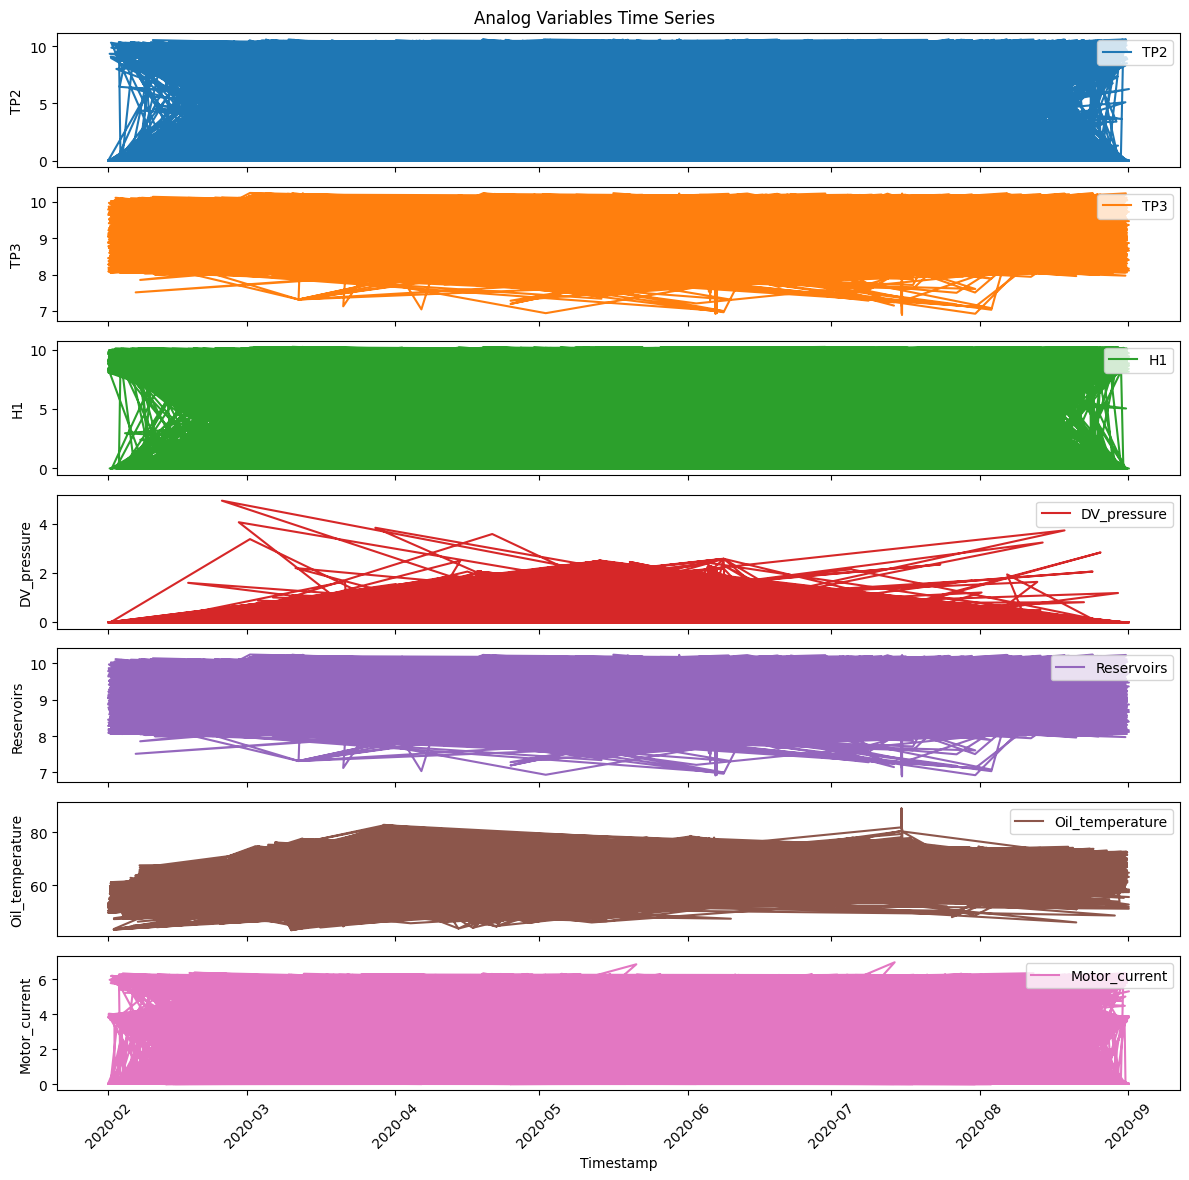

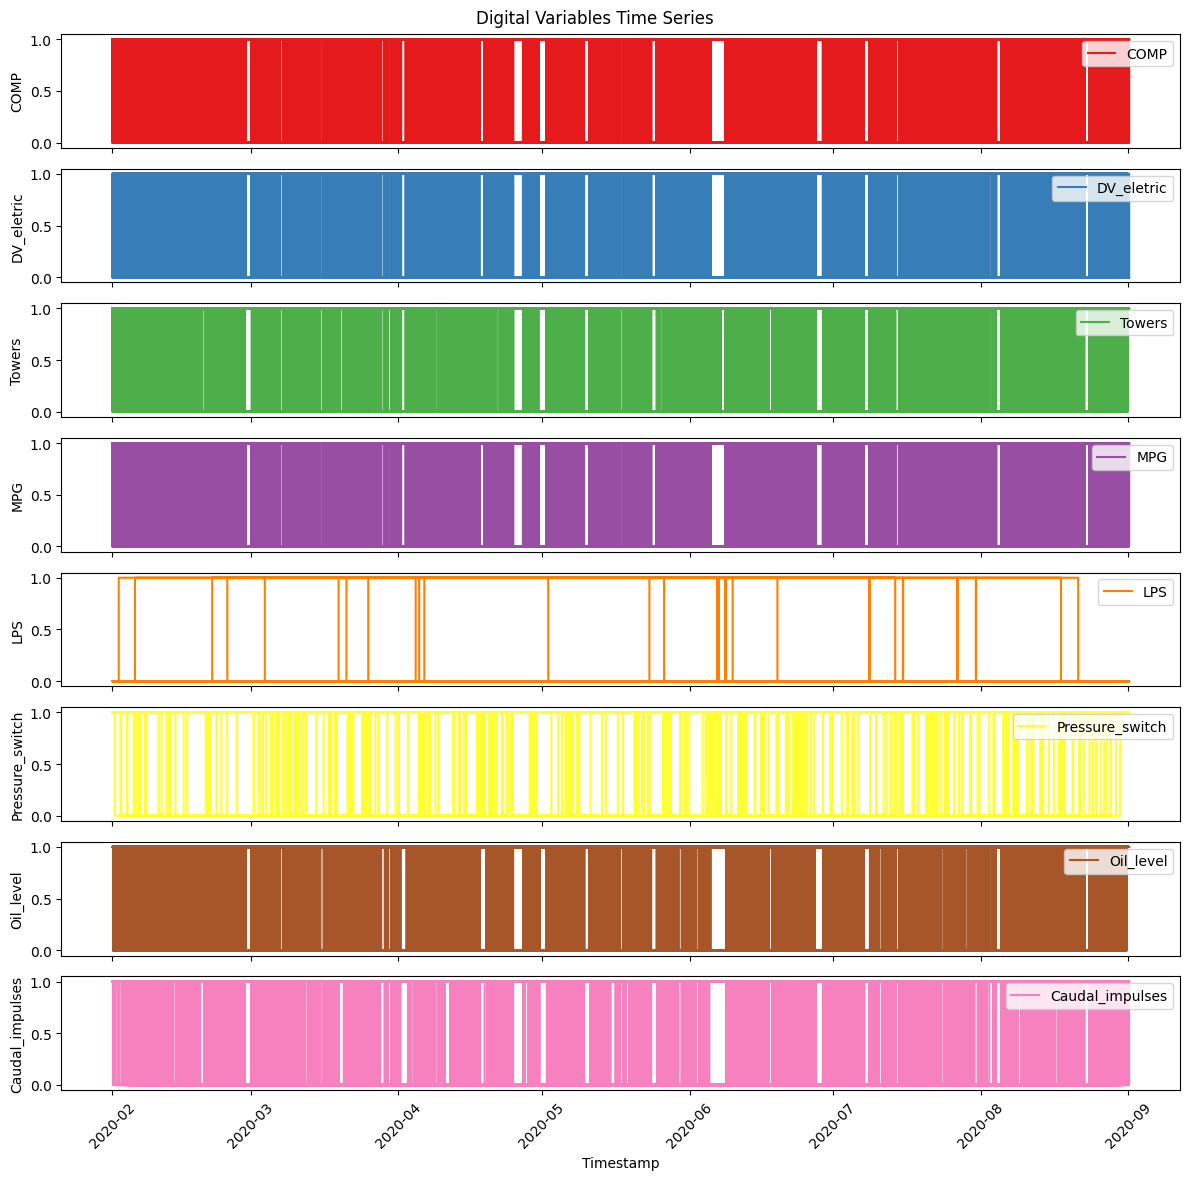

In [32]:
# Load Data
df_pre = pd.read_csv("pre-processed_file.csv")

# Convert timestamp column to datetime format
df_pre['timestamp'] = pd.to_datetime(df_pre['timestamp'])
df_pre.set_index('timestamp', inplace=True)

# Define the analog and digital columns
analog_columns = ['TP2', 'TP3', 'H1', 'DV_pressure', 'Reservoirs', 'Oil_temperature', 'Motor_current']
digital_columns = ['COMP', 'DV_eletric', 'Towers', 'MPG', 'LPS', 'Pressure_switch', 'Oil_level', 'Caudal_impulses']

# Get a list of unique colors for each plot
analog_colors = sn.color_palette("tab10", len(analog_columns))  # Tab10 gives 10 distinct colors
digital_colors = sn.color_palette("Set1", len(digital_columns))  # Set1 for digital values

# Set figure size
plt.figure(figsize=(12, 8))

# Plot analog variables in a single figure with subplots
fig, axes = plt.subplots(nrows=len(analog_columns), ncols=1, figsize=(12, 12), sharex=True)

for i, col in enumerate(analog_columns):
    axes[i].plot(df_pre.index, df_pre[col], label=col, linewidth=1.5, color=analog_colors[i])
    axes[i].set_ylabel(col)
    axes[i].legend(loc='upper right')

plt.suptitle("Analog Variables Time Series")
plt.xlabel("Timestamp")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot digital variables separately using step plots
fig, axes = plt.subplots(nrows=len(digital_columns), ncols=1, figsize=(12, 12), sharex=True)

for i, col in enumerate(digital_columns):
    axes[i].step(df_pre.index, df_pre[col], label=col, linewidth=1.5, where='post', color=digital_colors[i])
    axes[i].set_ylabel(col)
    axes[i].legend(loc='upper right')

plt.suptitle("Digital Variables Time Series")
plt.xlabel("Timestamp")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**Interpretation of the above graphs plotted:**

Analog Sensors:

TP2, TP3, H1 -

Observation:

These variables have a dense, almost completely filled range, indicating minimal variation over time.

Possible Causes:

These sensors might be measuring stable system parameters.
The data logging interval could be too high, making it look overcrowded.

Potential data duplication or redundancy in measurement.

Insights:

If this is expected behavior, it confirms system stability.

If there should be variations, we can consider checking for sensor saturation, faulty readings, or missing outliers.

DV_pressure, Reservoirs, Oil_temperature -

DV_pressure:

The red line fluctuates significantly.

It shows an increasing trend with some sharp peaks.

This could indicate pressure buildup, leaks, or system inefficiencies.

Reservoirs:

The reservoir levels are mostly stable, but occasional dips indicate possible depletion or operational fluctuations.

Consistent levels may mean an automatic replenishment system is working.

Oil Temperature:

General increase in temperature.
The sudden spike might be an outlier, transient event, or an overheating issue.

Insights:

Investigate why pressure fluctuates—potential leak detection?
Check if reservoir dips correlate with system demand.

Should verify if oil temperature spikes correspond to high load or external conditions.

Motor_current - Electrical Load

Observation:

The motor current is highly dense, suggesting constant operation.

Small white gaps may indicate power-off states or data loss.
Possible Causes:

Regular operational cycles.

Potential overload conditions if the current is consistently high.

Data logging issues if the gaps weren't expected.

Insights:

If motor current should vary, but doesn't, check if load conditions are being ignored.

Digital Sensors:

COMP (Red) -

The component remains mostly active for extended durations, with some short OFF periods (white gaps).

The OFF periods are sporadic but noticeable.

The frequency of OFF states seems to increase towards the middle of the time series.

DV_electric (Blue) -

This variable follows a similar pattern to COMP, with extended active periods and occasional OFF gaps.

The OFF states appear to align with some of the OFF states in COMP.

Towers (Green) -

This variable has more frequent transitions between ON and OFF states.

The pattern is more irregular compared to COMP and DV_electric.

MPG (Purple) -

The activation pattern is similar to COMP and DV_electric, though with some distinct OFF periods.

Larger OFF gaps suggest potential shutdown or maintenance periods.

Second Image (Additional Digital Variables Time Series)
This graph includes LPS, Pressure_switch, Oil_level, and Caudal_impulses.

LPS (Orange) -

This variable is OFF most of the time but has occasional spikes of activation.

The activations seem sparse, suggesting a system that only operates in specific conditions.

Pressure_switch (Yellow) -

Frequent ON/OFF transitions suggest this is a rapidly changing signal.

The rapid toggling could indicate a pressure-sensitive component responding to system changes.

Oil_level (Brown) -

Similar to COMP in the first graph, this variable remains ON for extended periods with occasional OFF states.

The OFF states might indicate refilling or oil depletion events.

Caudal_impulses (Pink) -

Shows many short-duration OFF states, indicating fluctuations in operation.

The pattern is somewhat consistent with Oil_level, suggesting a dependency.

Time-Based Observations:

Early 2020 (January - March):

Most components were consistently ON, with occasional brief shutdowns.

LPS had almost no activation in this period.

Pressure_switch showed frequent activity, indicating a dynamic process.

Mid-2020 (April - June):

Increased OFF states in COMP, Oil_level, and MPG, possibly indicating system downtimes, maintenance, or external operational factors.

Caudal_impulses and Pressure_switch remained very active.

Late 2020 (July - September):

More frequent OFF states across multiple variables suggest further interruptions in operations.

LPS showed more activity than before.

In [33]:
df_pre.reset_index()

,timestamp,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Motor_current,COMP,DV_eletric,Towers,MPG,LPS,Pressure_switch,Oil_level,Caudal_impulses,status
0,2020-04-18 00:00:01,-0.018,8.248,8.238,-0.024,8.248,49.450,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1
1,2020-04-18 00:00:13,-0.018,8.248,8.238,-0.024,8.248,49.450,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1
2,2020-04-18 00:00:24,-0.018,8.248,8.238,-0.024,8.248,49.450,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1
3,2020-04-18 00:00:36,-0.018,8.248,8.238,-0.024,8.248,49.450,0.0400,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,2020-04-18 00:00:49,-0.018,8.248,8.238,-0.024,8.248,49.450,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59440,2020-02-14 13:56:20,-0.012,8.484,8.466,-0.014,8.488,58.175,0.0325,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0
59441,2020-08-20 19:30:35,-0.010,9.180,9.166,-0.018,9.182,63.650,0.0425,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0
59442,2020-03-29 10:23:42,7.762,8.610,-0.004,0.578,8.610,77.850,5.5700,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0
59443,2020-02-09 09:14:00,-0.014,8.770,8.756,-0.016,8.774,55.825,0.0350,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0


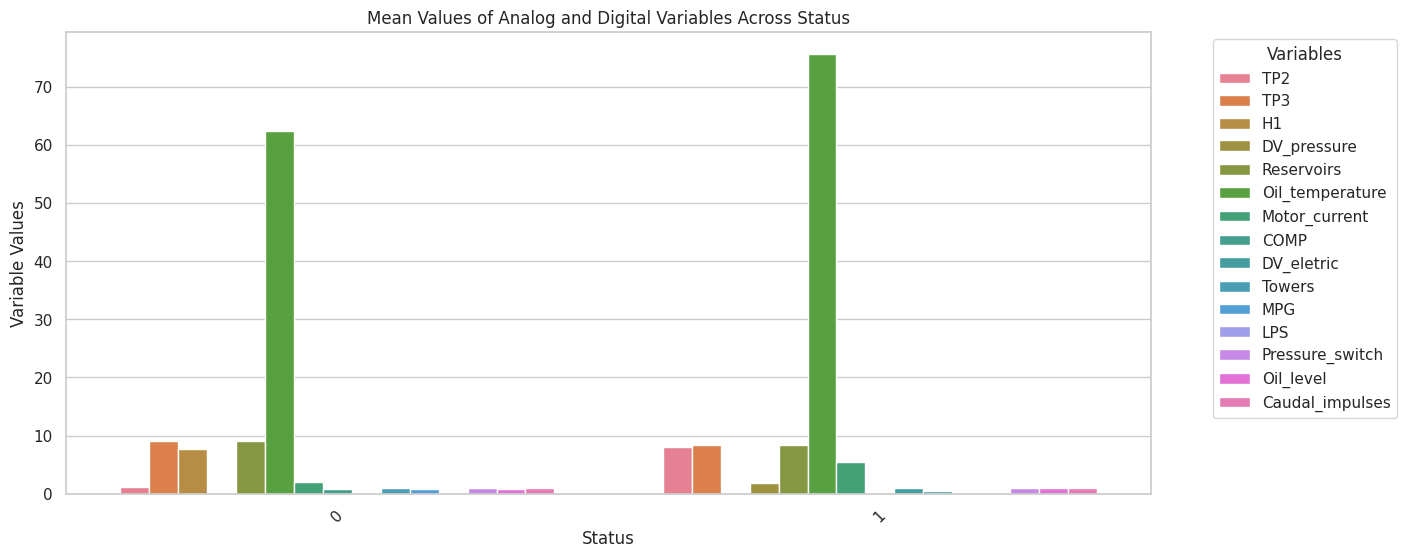

In [34]:
# Define analog and digital variables
analog_vars = ["TP2", "TP3", "H1", "DV_pressure", "Reservoirs", "Oil_temperature", "Motor_current"]
digital_vars = ["COMP", "DV_eletric", "Towers", "MPG", "LPS", "Pressure_switch", "Oil_level", "Caudal_impulses"]

# Combine analog and digital variables
all_vars = analog_vars + digital_vars

# Melt the dataframe to bring all variables into a single column
df_melted = df_pre.melt(id_vars=["status"], value_vars=all_vars, var_name="Variable", value_name="Value")

# Set plot style
sn.set_theme(style="whitegrid")

# Plot barplot to show the mean values of analog and digital variables for each status
plt.figure(figsize=(14, 6))
sn.barplot(data=df_melted, x="status", y="Value", hue="Variable", errorbar=None)
plt.title("Mean Values of Analog and Digital Variables Across Status")
plt.xlabel("Status")
plt.ylabel("Variable Values")
plt.legend(title="Variables", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.show()

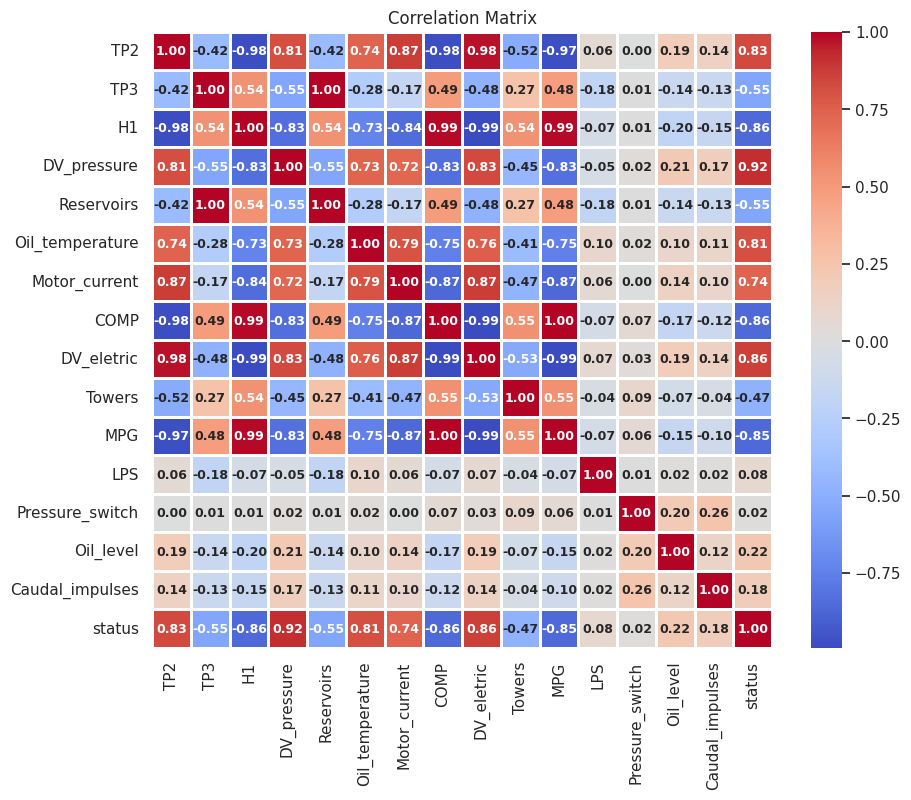

In [35]:
#Checking the correlation matrix
corr = df_pre.corr()
# Plot the correlation matrix using Seaborn's heatmap
plt.figure(figsize=(10, 8))
sn.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.9, annot_kws={"size": 9, "weight": "bold"})
plt.title('Correlation Matrix')
plt.show()

From the above correlation matrix we can analyse that there is a strong correlation between predictor varibles i.e we have multicollinearity between predictor variables.
Ex. DV_electric and TP2 Reservoirs and TP2

Next step would be Feature Selection

# Feature Selection


As above from Correlation matrix we have observed multicollinearity among predictor variables hence we will be using elastic net for feature selection.

Elastic Net is a regularized regression method that linearly combines the penalties of Lasso (L1) and Ridge (L2) regression. It is particularly useful when dealing with datasets that have highly correlated features.

Feature Selection: The L1 component encourages sparsity, effectively selecting a subset of features by shrinking some coefficients to zero. This makes Elastic Net particularly useful for feature selection in high-dimensional datasets.

Handling Multicollinearity: The L2 component helps to handle multicollinearity by distributing the coefficient values among correlated features, which can improve model stability and performance.

In [36]:
# Drop non-numeric columns and handle missing values
df_numeric = df_pre.select_dtypes(include=[np.number]).dropna()

# Define features (X) and target (y) - 'status' is the target variable
X = df_numeric.drop(columns=["status"], errors="ignore")  # Remove 'status' if present
y = df_numeric["status"] if "status" in df_numeric.columns else None

# Store original column names before scaling
feature_names = X.columns

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Apply ElasticNetCV to find the best alpha & l1_ratio
elastic_net = ElasticNetCV(l1_ratio=[0.1, 0.5, 0.9, 1.0], cv=5, random_state=42)
elastic_net.fit(X_train, y_train)

# Get feature importance (absolute coefficient values)
feature_importance = np.abs(elastic_net.coef_)

# Select important features
selected_features = X.columns[feature_importance > 0]  # Keep features with non-zero coefficients

# Display selected features
selected_features.tolist()


['TP2',
 'H1',
 'DV_pressure',
 'Reservoirs',
 'Oil_temperature',
 'Motor_current',
 'COMP',
 'Towers',
 'MPG',
 'LPS',
 'Oil_level',
 'Caudal_impulses']

In [37]:
#We had 15 features and after applying elastic net now we have only 12 important features
print(f"List of features before selection:\n {', '.join(feature_names)}")
print(f"List of selected features:\n {', '.join(selected_features)}")

List of features before selection:
 TP2, TP3, H1, DV_pressure, Reservoirs, Oil_temperature, Motor_current, COMP, DV_eletric, Towers, MPG, LPS, Pressure_switch, Oil_level, Caudal_impulses
List of selected features:
 TP2, H1, DV_pressure, Reservoirs, Oil_temperature, Motor_current, COMP, Towers, MPG, LPS, Oil_level, Caudal_impulses


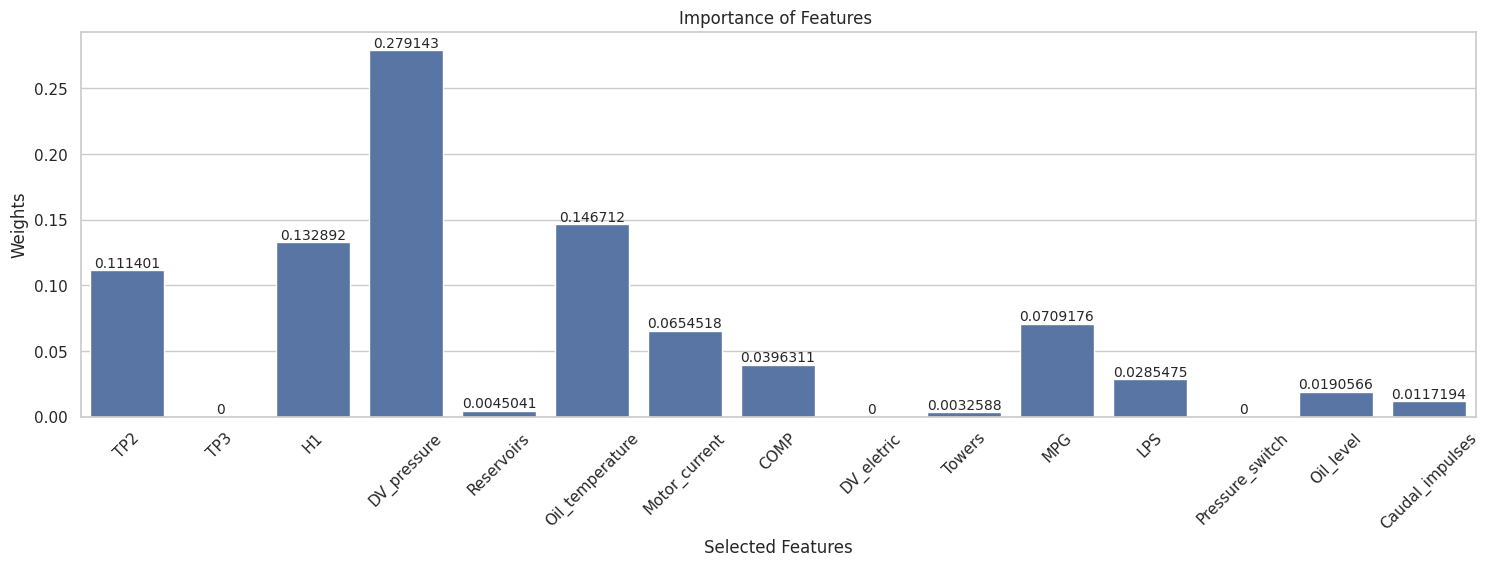

In [46]:
#Visualize weights of the features

plt.figure(figsize=(18, 5))
ax = sn.barplot(x = feature_names, y = np.abs(elastic_net.coef_))
ax.bar_label(ax.containers[0], fontsize=10);

plt.title('Importance of Features ')
plt.xticks(rotation=45)
plt.xlabel('Selected Features')
plt.ylabel('Weights')
plt.show()

From above graph

we can understand that highest influence on target variable(status) is DV_pressure since it has highest weight.

The least influence on target variable status is Towers

TP3, DV_electric and Pressure_switch has 0 as its weight indicating these features are not useful.

Positive weight → Feature increases the target variable.
Negative weight → Feature decreases the target variable

In [48]:
y = np.abs(elastic_net.coef_)
print(y)


[0.11140064 0.         0.13289215 0.27914323 0.0045041  0.14671213
 0.06545181 0.03963115 0.         0.0032588  0.07091763 0.02854752
 0.         0.01905658 0.01171936]


In [50]:
print(feature_names)

Index(['TP2', 'TP3', 'H1', 'DV_pressure', 'Reservoirs', 'Oil_temperature',
       'Motor_current', 'COMP', 'DV_eletric', 'Towers', 'MPG', 'LPS',
       'Pressure_switch', 'Oil_level', 'Caudal_impulses'],
      dtype='object')


In [51]:
print(type(y), type(selected_features))

<class 'numpy.ndarray'> <class 'pandas.core.indexes.base.Index'>


In [53]:
df = pd.DataFrame({'Feature': feature_names, 'Feature Weight': y})

# Step 3: Save to a CSV file
df.to_csv('feature_weights.csv', index=False)

print("CSV file saved successfully!")

CSV file saved successfully!
